In [1]:
#Dependencies
import pandas as pd
import requests
import json
import os

In [2]:
# pulling in datasets

#cdc csv
cdc = "cdc_pre_vax.csv"

#policy data
policy = "policy_table.csv"

In [3]:
cdc_df = pd.read_csv(cdc)
policy_df = pd.read_csv(policy)

In [4]:
cdc_df


,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death
0,2020-03-01,NY,0,0,0,0
1,2020-03-02,NY,0,0,0,0
2,2020-03-03,NY,0,0,0,0
3,2020-03-04,NY,1,1,0,0
4,2020-03-05,NY,12,11,0,0
...,...,...,...,...,...,...
787,2021-03-27,TX,"2,768,665","3,219","48,560",55
788,2021-03-28,TX,"2,772,080","3,415","48,603",43
789,2021-03-29,TX,"2,775,669","3,589","48,649",46
790,2021-03-30,TX,"2,778,808","3,139","48,677",28


In [5]:
policy_df

,Date,State,Stay at Home Orders
0,2020-03-01,NY,0.0
1,2020-03-02,NY,0.0
2,2020-03-03,NY,0.0
3,2020-03-04,NY,0.0
4,2020-03-05,NY,0.0
...,...,...,...
787,2021-03-27,TX,1.0
788,2021-03-28,TX,1.0
789,2021-03-29,TX,1.0
790,2021-03-30,TX,1.0


In [6]:
ship_df = pd.merge(cdc_df, policy_df, on = ['Date','State'])

In [7]:
ship_df

,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death,Stay at Home Orders
0,2020-03-01,NY,0,0,0,0,0.0
1,2020-03-02,NY,0,0,0,0,0.0
2,2020-03-03,NY,0,0,0,0,0.0
3,2020-03-04,NY,1,1,0,0,0.0
4,2020-03-05,NY,12,11,0,0,0.0
...,...,...,...,...,...,...,...
787,2021-03-27,TX,"2,768,665","3,219","48,560",55,1.0
788,2021-03-28,TX,"2,772,080","3,415","48,603",43,1.0
789,2021-03-29,TX,"2,775,669","3,589","48,649",46,1.0
790,2021-03-30,TX,"2,778,808","3,139","48,677",28,1.0


In [8]:
ship_df2 = ship_df.groupby("State")["Total Cases"].count()
print(ship_df2)

State
NY    396
TX    396
Name: Total Cases, dtype: int64


In [9]:
ship_df.to_csv("shelter_in_place.csv", index=False, header=True)

In [10]:
import matplotlib.pyplot as plt

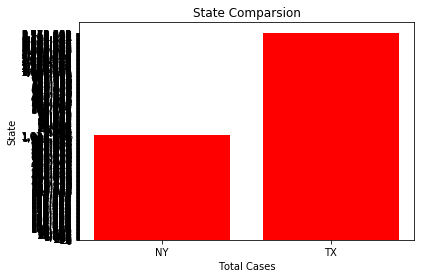

In [22]:
plt.bar("State", "Total Cases", data = ship_df, color = ["blue", "red"])
plt.xlabel("Total Cases")
plt.ylabel("State")
plt.title("State Comparsion")
plt.show(100)

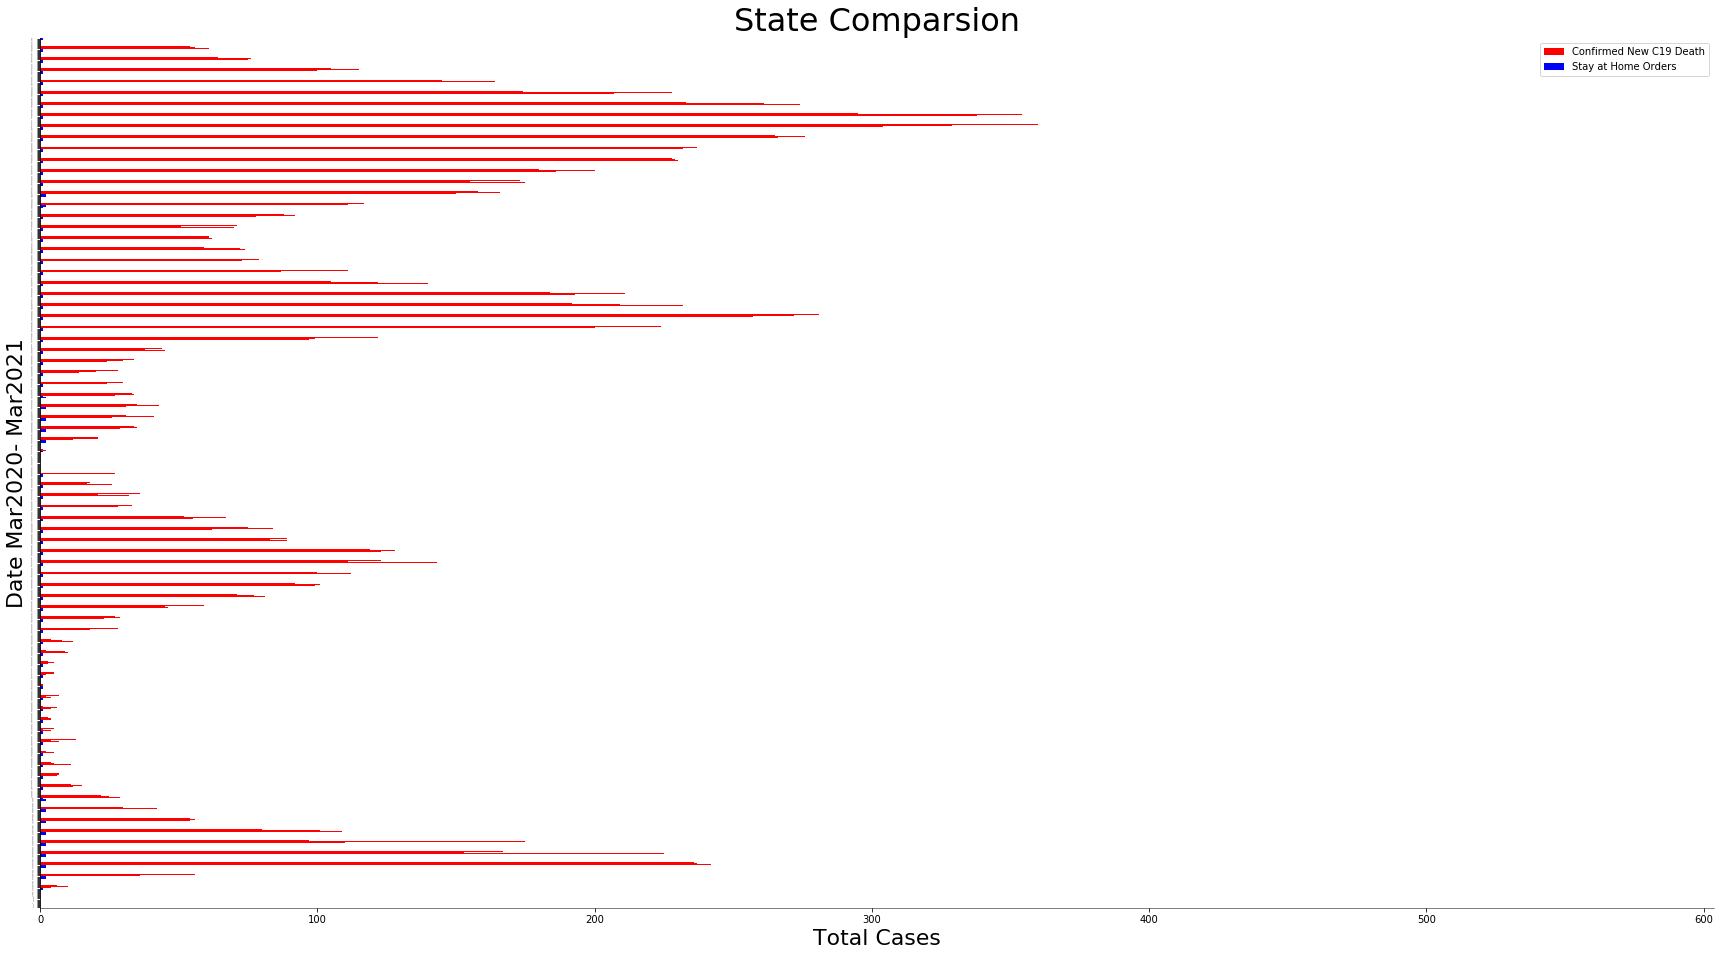

In [12]:
barh = ship_df.plot(kind='barh',figsize=(30, 16), color = ["red", "blue"])
barh
plt.yticks(fontsize = 0)
plt.xticks(fontsize = 10)
plt.xlabel("Total Cases", fontsize = 22)
plt.ylabel("Date Mar2020- Mar2021", fontsize = 22)
plt.title("State Comparsion", fontsize=32)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.5)
barh.spines['left'].set_visible(True)
plt.show()

In [20]:
g1 = ship_df.loc[ship_df.generation==1,:]
# dataframe.plot.scatter() method
g1.plot.scatter('States', 'Total Cases'); # The ';' is to avoid showing a message before showing the plot

AttributeError: 'DataFrame' object has no attribute 'generation'

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(ship_df, x_vars=['State'], 
             y_vars='Total Cases', size=30, aspect=1, kind='scatter')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

In [ ]:
# FoLlowing the regression equation, our dependent variable (y) is the GPA
y = ship_df ['State']
# Similarly, our independent variable (x) 
x1 = ship_df ['Total Cases']

In [ ]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
g1 = (policy_df)
g2 = (cdc_df)
g3 = (ship_df)

data = (g1, g2, g3)
colors = ("red", "green", "blue")
#groups = ("coffee", "tea", "water")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")

for data, color, group in zip(data, colors, groups):
    x, y = data
ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

In [ ]:
df_kor = ship_df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(df_kor, vmin=-6, vmax=6, cmap="viridis", annot=True, linewidth=0.1)

In [ ]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
X = ship_df[['State']].values.reshape(-1,2)
Y = ship_df['Total Cases']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
file = ship_df
df = pd.read_csv(file)

xx = ship_df[['State'].values.reshape(-1,2)

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, ship_df, fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, ship_df, fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, ship_df, fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()